In [1]:
from sklearn.model_selection import train_test_split
import utils
import train
import predict
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
import numpy as np
from osgeo import gdal
from matplotlib import pyplot as plt
import cv2 as cv

Using TensorFlow backend.
W0611 22:07:24.174565 17684 deprecation_wrapper.py:119] From F:\Github\DeepLearningForLandUseLandCoverClassification\train.py:29: The name tf.keras.layers.CuDNNGRU is deprecated. Please use tf.compat.v1.keras.layers.CuDNNGRU instead.

W0611 22:07:24.176560 17684 deprecation_wrapper.py:119] From F:\Github\DeepLearningForLandUseLandCoverClassification\train.py:29: The name tf.keras.layers.CuDNNLSTM is deprecated. Please use tf.compat.v1.keras.layers.CuDNNLSTM instead.



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
K.clear_session()

In [4]:
# filepath1 = './'
# ipath = []
# cpath = []
# size = 256
# #List of all jps and tif files
# ipath.append("./image2.tif")
# cpath.append("./label2.tif")

# img_id,tile_id,y_coord,x_coord = train.fetch_tiles_info(ipath)
# img_id,tile_id,y_coord,x_coord = utils.shuffle_list(img_id,tile_id,y_coord,x_coord)

# img_id_train,img_id_val,tile_id_train,tile_id_val,y_coord_train,y_coord_val,x_coord_train,x_coord_val = train_test_split(img_id,tile_id,y_coord,x_coord, train_size = 0.6, random_state=64, shuffle = True)
# img_id_dev,img_id_test,tile_id_dev,tile_id_test,y_coord_dev,y_coord_test,x_coord_dev,x_coord_test = train_test_split(img_id_val,tile_id_val,y_coord_val,x_coord_val, train_size = 0.5, random_state=128, shuffle = True)

In [5]:
ipath_train = utils.get_all_images("./images/train/img", "tif")
cpath_train = utils.get_all_images("./images/train/mask", "tif")
ipath_dev = utils.get_all_images("./images/dev/img", "tif")
cpath_dev = utils.get_all_images("./images/dev/mask", "tif")
ipath_test = utils.get_all_images("./images/test/img", "tif")
cpath_test = utils.get_all_images("./images/test/mask", "tif")


img_id_train,tile_id_train,y_coord_train,x_coord_train = train.fetch_tiles_info(ipath_train)
img_id_train,tile_id_train,y_coord_train,x_coord_train = utils.shuffle_list(img_id_train,tile_id_train,y_coord_train,x_coord_train)

img_id_dev,tile_id_dev,y_coord_dev,x_coord_dev = train.fetch_tiles_info(ipath_dev)
img_id_dev,tile_id_dev,y_coord_dev,x_coord_dev = utils.shuffle_list(img_id_dev,tile_id_dev,y_coord_dev,x_coord_dev)

img_id_test,tile_id_test,y_coord_test,x_coord_test = train.fetch_tiles_info(ipath_test)
img_id_test,tile_id_test,y_coord_test,x_coord_test = utils.shuffle_list(img_id_test,tile_id_test,y_coord_test,x_coord_test)

image: 0, number of tiles: 441
image: 1, number of tiles: 441
image: 0, number of tiles: 441
image: 0, number of tiles: 441


In [6]:
batch = 64
val_batch = 32

size = 256
seed =140
epoch =100
lri = 1e-4
steps_train = len(img_id_train)//batch
steps_val = len(img_id_dev)//val_batch

train_generator = train.msk_generator(ipath_train,cpath_train,img_id_train,tile_id_train,y_coord_train,x_coord_train, batch)
val_generator = train.msk_generator(ipath_dev,cpath_dev,img_id_dev,tile_id_dev,y_coord_dev,x_coord_dev, val_batch)


c:\python36\lib\site-packages\keras_preprocessing\image.py:1643: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (64, 256, 256, 6) (6 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
c:\python36\lib\site-packages\keras_preprocessing\image.py:1643: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (32, 256, 256, 6) (6 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


In [7]:
train.training(train_generator,val_generator,steps_train,steps_val,lri,epoch,size,seed)

W0611 22:07:31.786714 17684 callbacks.py:875] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 6) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 3520        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

W0611 22:07:33.610388 17684 deprecation.py:323] From c:\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100

Epoch 00001: val_loss improved from inf to 3.68401, saving model to ./model_1.h5
41/41 - 80s - loss: 3.8587 - mean_io_u: 0.3750 - dice: 1.0551 - val_loss: 3.6840 - val_mean_io_u: 0.3750 - val_dice: 1.0838
Epoch 2/100

Epoch 00002: val_loss improved from 3.68401 to 3.08124, saving model to ./model_1.h5
41/41 - 60s - loss: 2.9926 - mean_io_u: 0.3796 - dice: 1.6201 - val_loss: 3.0812 - val_mean_io_u: 0.3750 - val_dice: 1.5004
Epoch 3/100

Epoch 00003: val_loss improved from 3.08124 to 2.67549, saving model to ./model_1.h5
41/41 - 60s - loss: 2.2691 - mean_io_u: 0.3750 - dice: 2.1216 - val_loss: 2.6755 - val_mean_io_u: 0.3750 - val_dice: 1.8281
Epoch 4/100

Epoch 00004: val_loss improved from 2.67549 to 2.42252, saving model to ./model_1.h5
41/41 - 61s - loss: 1.8384 - mean_io_u: 0.3750 - dice: 2.5132 - val_loss: 2.4225 - val_mean_io_u: 0.3750 - val_dice: 2.0192
Epoch 5/100

Epoch 00005: val_loss did not improve from 2.42252
41/41 - 59s - loss: 1.8263 - mean_io_u: 0.3750 - dic

KeyboardInterrupt: 

In [8]:
K.clear_session()
tr_generator = train.msk_generator(ipath_train,cpath_train,img_id_train,tile_id_train,y_coord_train,x_coord_train, val_batch)
vl_generator = train.msk_generator(ipath_dev,cpath_dev,img_id_dev,tile_id_dev,y_coord_dev,x_coord_dev, val_batch)
test_generator = train.msk_generator(ipath_test,cpath_test,img_id_test,tile_id_test,y_coord_test,x_coord_test, val_batch)
model = train.unet(size, lri)
model.load_weights("./model_1.h5")



In [9]:
print('Metrics: ', model.metrics_names)  
l,iou,dice = model.evaluate(train_generator, verbose=1, steps=len(x_coord_train)//(val_batch))

l,iou,dice = model.evaluate(val_generator, verbose=1, steps=len(x_coord_dev)//(val_batch))

l,iou,dice = model.evaluate(test_generator, verbose=1, steps=len(x_coord_test)//(val_batch))

   
K.clear_session()
del model 


Metrics:  ['loss', 'mean_io_u', 'dice']
27/27 [==============================] - 10s 365ms/step - loss: 1.4112 - mean_io_u: 0.6006 - dice: 2.7122


In [10]:
K.clear_session()
folder = "./images/test/img"
mpath = "./model_1.h5"
model = train.unet(size, lri)
model.load_weights(mpath)

flist = utils.get_all_images(folder, "tif")
predict.predict_all_images(flist,model,val_batch//2,True)

K.clear_session()
del model


predicting
 21 / 21 adjusted height
adjusted width
height and width not equal to size
(5490, 5490)
0: 22057325, 1: 1534756, 2: 4984950, 3: 1563069
image 1 saved


(5490, 5490)


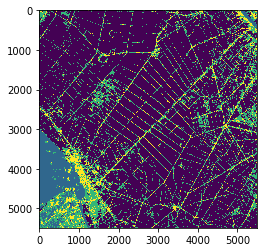

In [11]:
pred = cv.imread("./predictions/prediction_1.tif",-1)
print(pred.shape)
plt.imshow(pred)
plt.show()

In [12]:
pred1 = np.expand_dims(pred,axis =-1)
pred1.shape

(5490, 5490, 1)

In [13]:
for s in set(pred.ravel()):
    print("class: {}, count: {}".format(s,np.sum(pred[pred==s])//s))

class: 0, count: 0
class: 1, count: 1534756
class: 2, count: 4984950
class: 3, count: 1563069


c:\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in ulong_scalars
  


In [14]:
from tensorflow.keras.utils import to_categorical
pred1 = to_categorical(pred,4)
pred1[:,:,0] +=pred1[:,:,-1]
pred1[:,:,1] +=pred1[:,:,-1]
pred1 = 255 * pred1[:,:,:-1]
pred1 = cv.cvtColor(pred1, cv.COLOR_RGB2BGR)
cv.imwrite("./prediction_1-rgb.tif",pred1.astype(np.uint8))

True

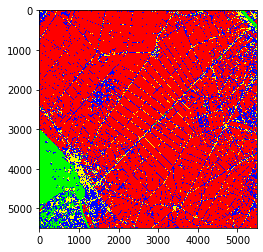

In [15]:
pred_bgr = cv.imread("./prediction_1-rgb.tif")
pred_rgb = cv.cvtColor(pred_bgr, cv.COLOR_BGR2RGB)
plt.imshow(pred_rgb)
plt.show()